<a href="https://colab.research.google.com/github/CodeHunterOfficial/AI_DataMining/blob/main/Statics/%D0%93%D0%BB%D0%B0%D0%B2%D0%B0_6_%D0%9E%D1%86%D0%B5%D0%BD%D0%BA%D0%B0_%D0%BA%D0%B0%D1%87%D0%B5%D1%81%D1%82%D0%B2%D0%B0_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B5%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Глава 6. Оценка качества моделей

Важным этапом разработки моделей машинного обучения является оценка их качества. Это позволяет не только понять, насколько хорошо модель справляется с задачей, но и сравнивать разные модели между собой. В этой лекции мы подробно рассмотрим следующие аспекты:

1. **Метрики для оценки производительности**:
   - Точность (Accuracy)
   - Полнота (Recall)
   - F1-мера (F1-score)
   - AUC-ROC (Area Under the Curve - Receiver Operating Characteristic)

2. **Кросс-валидация и её применение**:
   - K-fold
   - Leave-One-Out (LOO)

3. **Анализ ошибок и интерпретация результатов**.

## 1. Метрики для оценки производительности

### 1.1 Точность (Accuracy)

Точность — это доля правильно предсказанных наблюдений к общему числу наблюдений.

Формально, точность вычисляется по формуле:

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

где:
- $TP$ — количество истинно положительных (true positives),
- $TN$ — количество истинно отрицательных (true negatives),
- $FP$ — количество ложно положительных (false positives),
- $FN$ — количество ложно отрицательных (false negatives).

**Пример**:

Предположим, что у нас есть 100 наблюдений:
- 50 истинно положительных,
- 30 истинно отрицательных,
- 10 ложно положительных,
- 10 ложно отрицательных.

Тогда точность будет:

$$
\text{Accuracy} = \frac{50 + 30}{100} = \frac{80}{100} = 0.8 \quad (80\%)
$$

### 1.2 Полнота (Recall)

Полнота, или чувствительность, измеряет долю истинно положительных результатов среди всех положительных наблюдений. Она определяется как:

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

**Пример**:

Используя наши данные:

$$
\text{Recall} = \frac{50}{50 + 10} = \frac{50}{60} \approx 0.833 \quad (83.3\%)
$$

### 1.3 F1-мера (F1-score)

F1-мера — это гармоническое среднее точности и полноты, которое используется, когда необходимо учесть оба показателя. Она вычисляется по формуле:

$$
F1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

где точность ($Precision$) определяется как:

$$
\text{Precision} = \frac{TP}{TP + FP}
$$

**Пример**:

Сначала найдем точность:

$$
\text{Precision} = \frac{50}{50 + 10} = \frac{50}{60} \approx 0.833 \quad (83.3\%)
$$

Теперь подставим значения в формулу для F1-меры:

$$
F1 = 2 \cdot \frac{0.833 \cdot 0.833}{0.833 + 0.833} = 2 \cdot \frac{0.694}{1.666} \approx 0.833 \quad (83.3\%)
$$

### 1.4 AUC-ROC (Area Under the Curve - Receiver Operating Characteristic)

ROC-кривая отображает соотношение между истинными положительными и ложными положительными результатами при различных порогах классификации. AUC — это площадь под этой кривой, где значение 1 указывает на идеальную модель, а 0.5 — на случайную.

**Пример**:

Если у нас есть 5 различных порогов, и мы вычислили соответствующие значения TPR (True Positive Rate) и FPR (False Positive Rate), ROC-кривая может выглядеть следующим образом:

- Порог 1: TPR = 1, FPR = 0
- Порог 2: TPR = 0.8, FPR = 0.1
- Порог 3: TPR = 0.6, FPR = 0.3
- Порог 4: TPR = 0.4, FPR = 0.4
- Порог 5: TPR = 0.1, FPR = 0.9

При построении ROC-кривой и расчете площади под ней можно использовать численные методы интегрирования, такие как правило трапеций.

## 2. Кросс-валидация и её применение

### 2.1 K-fold кросс-валидация

K-fold кросс-валидация — это метод, при котором исходные данные делятся на $K$ подвыборок (folds). Модель обучается на $K-1$ подвыборках и тестируется на оставшейся. Процесс повторяется $K$ раз, и в конце результаты усредняются.

**Пример**:

Предположим, у нас есть 100 наблюдений и мы используем 5-fold кросс-валидацию. Это значит, что мы разделим данные на 5 подвыборок по 20 наблюдений. Модель будет обучаться на 4 подвыборках и тестироваться на 1.

1. Обучение на Folds 1, 2, 3, 4; тестирование на Fold 5.
2. Обучение на Folds 1, 2, 3, 5; тестирование на Fold 4.
3. Обучение на Folds 1, 2, 4, 5; тестирование на Fold 3.
4. Обучение на Folds 1, 3, 4, 5; тестирование на Fold 2.
5. Обучение на Folds 2, 3, 4, 5; тестирование на Fold 1.

После этого усредняются все метрики.

### 2.2 Leave-One-Out (LOO)

Leave-One-Out кросс-валидация — это частный случай K-fold, где $K$ равно числу наблюдений. Каждое наблюдение по очереди используется как тестовое, а остальные как обучающие.

**Пример**:

Если у нас есть 5 наблюдений, LOO будет выглядеть так:

1. Тест на 1, обучение на 2, 3, 4, 5.
2. Тест на 2, обучение на 1, 3, 4, 5.
3. Тест на 3, обучение на 1, 2, 4, 5.
4. Тест на 4, обучение на 1, 2, 3, 5.
5. Тест на 5, обучение на 1, 2, 3, 4.

Этот метод дает оценку модели, но может быть вычислительно дорогим для больших наборов данных.

## 3. Анализ ошибок и интерпретация результатов

Анализ ошибок — это важная часть оценки моделей. Он включает в себя изучение случаев, когда модель ошиблась, чтобы понять, какие аспекты данных или модели можно улучшить.

### 3.1 Ошибки классификации

Ошибки классификации могут быть двух типов:
- **Ложно положительные** (False Positives): модель предсказала положительный результат, когда на самом деле он был отрицательным.
- **Ложно отрицательные** (False Negatives): модель предсказала отрицательный результат, когда на самом деле он был положительным.

### 3.2 Матрица ошибок

Матрица ошибок (confusion matrix) позволяет визуализировать производительность модели. Она имеет следующий вид:

$$
\begin{array}{|c|c|c|}
\hline
 & \text{Положительный} & \text{Отрицательный} \\
\hline
\text{Положительный} & TP & FN \\
\hline
\text{Отрицательный} & FP & TN \\
\hline
\end{array}
$$

Анализируя матрицу ошибок, можно выявить, какие классы наиболее трудны для классификации.

### 3.3 Визуализация результатов

Визуализация результатов может помочь в интерпретации производительности модели. Некоторые полезные графики включают:
- ROC-кривые
- Precision-Recall кривые
- Гистограммы ошибок

### Заключение

Оценка качества моделей — это критически важный этап в разработке систем машинного обучения. Понимание и правильное применение различных метрик, методов кросс-валидации и анализа ошибок позволяют обеспечить надёжность и эффективность разрабатываемых моделей. Это не только помогает в улучшении производительности модели, но и углубляет наше понимание задач, которые мы решаем с помощью машинного обучения.




Давайте рассмотрим конкретные числовые примеры для каждого аспекта оценки качества моделей, включая метрики, кросс-валидацию и анализ ошибок, и разберем их шаг за шагом.

## 1. Метрики для оценки производительности

### Пример 1: Точность (Accuracy)

Предположим, у нас есть следующие результаты для модели классификации:

- $TP = 50$ (истинно положительные)
- $TN = 30$ (истинно отрицательные)
- $FP = 10$ (ложно положительные)
- $FN = 10$ (ложно отрицательные)

Общее количество наблюдений: $TP + TN + FP + FN = 50 + 30 + 10 + 10 = 100$.

#### Шаг 1: Вычислим точность (Accuracy)

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN} = \frac{50 + 30}{100} = \frac{80}{100} = 0.8 \quad (80\%)
$$

Таким образом, точность нашей модели составляет 80%.

### Пример 2: Полнота (Recall)

Используем те же данные.

#### Шаг 2: Вычислим полноту (Recall)

$$
\text{Recall} = \frac{TP}{TP + FN} = \frac{50}{50 + 10} = \frac{50}{60} \approx 0.833 \quad (83.3\%)
$$

Полнота показывает, что модель правильно классифицировала 83.3% всех положительных наблюдений.

### Пример 3: F1-мера (F1-score)

Для вычисления F1-меры нам понадобится также значение точности (Precision).

#### Шаг 3: Вычислим точность (Precision)

$$
\text{Precision} = \frac{TP}{TP + FP} = \frac{50}{50 + 10} = \frac{50}{60} \approx 0.833 \quad (83.3\%)
$$

#### Шаг 4: Вычислим F1-меру

$$
F1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}} = 2 \cdot \frac{0.833 \cdot 0.833}{0.833 + 0.833} = 2 \cdot \frac{0.694}{1.666} \approx 0.833 \quad (83.3\%)
$$

Таким образом, F1-мера также равна 83.3%.

### Пример 4: AUC-ROC

Рассмотрим случай, когда мы предсказываем вероятность положительного класса для 6 наблюдений и устанавливаем различные пороги:

| Наблюдение | Истинный класс | Предсказанная вероятность |
|------------|----------------|----------------------------|
| 1          | 1              | 0.9                        |
| 2          | 0              | 0.8                        |
| 3          | 1              | 0.7                        |
| 4          | 1              | 0.6                        |
| 5          | 0              | 0.4                        |
| 6          | 0              | 0.3                        |

#### Шаг 5: Построим ROC-кривую

Для построения ROC-кривой вычислим TPR (True Positive Rate) и FPR (False Positive Rate) для нескольких порогов:

1. **Порог 0.5**:
   - Предсказанные положительные: наблюдения 1, 2, 3, 4.
   - TP = 3 (наблюдения 1, 3, 4), FP = 1 (наблюдение 2), FN = 0, TN = 2.
   - TPR = $\frac{TP}{TP + FN} = \frac{3}{3} = 1.0$.
   - FPR = $\frac{FP}{FP + TN} = \frac{1}{3} \approx 0.333$.

2. **Порог 0.7**:
   - Предсказанные положительные: наблюдения 1, 3.
   - TP = 2 (наблюдения 1, 3), FP = 0, FN = 1 (наблюдение 4), TN = 3.
   - TPR = $\frac{2}{3} \approx 0.667$.
   - FPR = $\frac{0}{3} = 0$.

Теперь можно построить ROC-кривую и вычислить площадь под кривой численно, применяя метод трапеций.

## 2. Кросс-валидация и её применение

### Пример 5: K-fold кросс-валидация

Предположим, у нас есть 10 наблюдений:

| Наблюдение | Класс |
|------------|-------|
| 1          | 1     |
| 2          | 0     |
| 3          | 1     |
| 4          | 0     |
| 5          | 1     |
| 6          | 0     |
| 7          | 1     |
| 8          | 0     |
| 9          | 1     |
| 10         | 0     |

Рассмотрим 5-fold кросс-валидацию, где данные будут делиться на 5 подвыборок по 2 наблюдения в каждой.

1. **Fold 1**: Тестовые данные: (1, 2), обучающие: (3, 4, 5, 6, 7, 8, 9, 10).
2. **Fold 2**: Тестовые данные: (3, 4), обучающие: (1, 2, 5, 6, 7, 8, 9, 10).
3. **Fold 3**: Тестовые данные: (5, 6), обучающие: (1, 2, 3, 4, 7, 8, 9, 10).
4. **Fold 4**: Тестовые данные: (7, 8), обучающие: (1, 2, 3, 4, 5, 6, 9, 10).
5. **Fold 5**: Тестовые данные: (9, 10), обучающие: (1, 2, 3, 4, 5, 6, 7, 8).

Для каждого этапа мы обучаем модель на 8 обучающих наблюдениях и тестируем на 2 тестовых, а затем усредняем результаты.

### Пример 6: Leave-One-Out кросс-валидация

Рассмотрим те же 10 наблюдений. В этом случае мы будем использовать 9 наблюдений для обучения и одно — для тестирования, итеративно проходя по каждому:

1. **Тестовое наблюдение**: 1; обучающие: (2-10).
2. **Тестовое наблюдение**: 2; обучающие: (1, 3-10).
3. И так далее, пока не протестируем все 10 наблюдений.

Результаты усредняются по всем 10 итерациям.

## 3. Анализ ошибок и интерпретация результатов

### Пример 7: Матрица ошибок

Предположим, мы классифицировали 100 наблюдений и получили следующие данные:

- $TP = 40$
- $TN = 50$
- $FP = 5$
- $FN = 5$

#### Шаг 6: Составим матрицу ошибок

$$
\begin{array}{|c|c|c|}
\hline
 & \text{Положительный} & \text{Отрицательный} \\
\hline
\text{Положительный} & 40 & 5 \\
\hline
\text{Отрицательный} & 5 & 50 \\
\hline
\end{array}
$$

### Шаг 7: Интерпретация матрицы

- Точность (Accuracy) = $\frac{40 + 50}{100} = 0.9 \quad (90\%)$
- Полнота (Recall) = $\frac{40}{40 + 5} = \frac{40}{45} \approx 0.889 \quad (88.9\%)$
- Точность (Precision) = $\frac{40}{40 + 5} = \frac{40}{45} \approx 0.889 \quad (88.9\%)$
- F1-мера = $2 \cdot \frac{0.889 \cdot 0.889}{0.889 + 0.889} \approx 0.889 \quad (88.9\%)$

Анализируя матрицу ошибок, мы видим, что модель имеет хороший баланс между положительными и отрицательными предсказаниями.

### Заключение

Приведенные примеры демонстрируют шаг за шагом применение метрик и методов оценки качества моделей, а также показаны подходы к кросс-валидации и анализу ошибок. Эти инструменты помогают глубже понять, насколько качественно модель решает поставленные задачи и где её можно улучшить.




Accuracy: 1.00
Recall: 1.00
Precision: 1.00
F1 Score: 1.00
AUC-ROC: 1.00


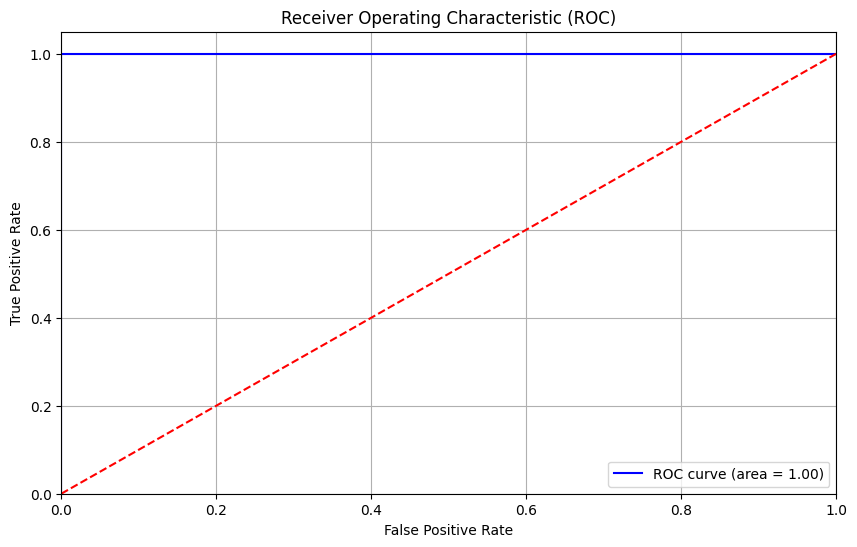

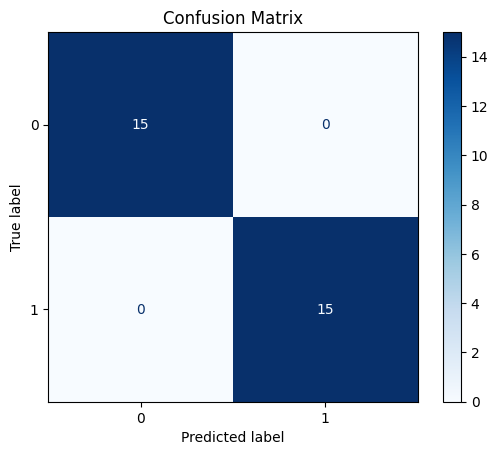

Средняя точность для 5-Fold кросс-валидации: 0.95
Средняя точность для Leave-One-Out кросс-валидации: 0.98


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import KFold, LeaveOneOut
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

# Создание данных для классификации
X, y = make_classification(n_samples=100, n_features=20, n_classes=2, random_state=42)

# Модель для классификации
model = LogisticRegression()

# Пример 1: Точность, Полнота, F1-мера, AUC-ROC
# Разделим данные на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Обучение модели
model.fit(X_train, y_train)

# Предсказание
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Вычисление метрик
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# ROC-кривая и AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Вывод результатов
print(f"Accuracy: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC-ROC: {roc_auc:.2f}")

# Визуализация ROC-кривой
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='b', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Пример 2: Матрица ошибок
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Пример 3: K-Fold Кросс-валидация
kf = KFold(n_splits=5)
accuracies = []
for train_index, test_index in kf.split(X):
    X_train_kf, X_test_kf = X[train_index], X[test_index]
    y_train_kf, y_test_kf = y[train_index], y[test_index]

    model.fit(X_train_kf, y_train_kf)
    y_pred_kf = model.predict(X_test_kf)
    acc = accuracy_score(y_test_kf, y_pred_kf)
    accuracies.append(acc)

print(f"Средняя точность для 5-Fold кросс-валидации: {np.mean(accuracies):.2f}")

# Пример 4: Leave-One-Out Кросс-валидация
loo = LeaveOneOut()
loo_accuracies = []
for train_index, test_index in loo.split(X):
    X_train_loo, X_test_loo = X[train_index], X[test_index]
    y_train_loo, y_test_loo = y[train_index], y[test_index]

    model.fit(X_train_loo, y_train_loo)
    y_pred_loo = model.predict(X_test_loo)
    loo_acc = accuracy_score(y_test_loo, y_pred_loo)
    loo_accuracies.append(loo_acc)

print(f"Средняя точность для Leave-One-Out кросс-валидации: {np.mean(loo_accuracies):.2f}")



### Вопросы для самопроверки

1. Какие метрики используются для оценки качества классификационных моделей? Опишите каждую из них.
2. Как вычисляется точность (Accuracy) классификационной модели? Приведите формулу.
3. В чем разница между точностью (Precision) и полнотой (Recall)?
4. Что такое F1-мера, и когда её полезно использовать?
5. Объясните, что такое ROC-кривая и AUC. Как они помогают в оценке качества модели?
6. В чем заключается основное различие между кросс-валидацией и обычным разделением данных на обучение и тестирование?
7. Опишите, как работает K-fold кросс-валидация.
8. Что такое Leave-One-Out кросс-валидация, и когда её целесообразно использовать?
9. Как интерпретировать матрицу ошибок? Что означают её элементы?
10. Какие преимущества и недостатки есть у метрики AUC-ROC?
11. В каких случаях F1-мера может быть лучше, чем просто использование точности или полноты?
12. Как определить оптимальный порог для бинарного классификатора на основе ROC-кривой?
13. Почему важно использовать кросс-валидацию при оценке производительности модели?
14. Как может помочь анализ ошибок в улучшении модели?
15. Какие существуют методы для интерпретации результатов моделей машинного обучения?

### Задачи для самостоятельной работы

1. Рассчитайте точность, полноту, F1-меру и AUC для модели, у которой $TP = 70$, $TN = 50$, $FP = 10$, $FN = 20$.
2. Постройте ROC-кривую для модели, предсказывающей вероятность положительного класса, для следующих данных: $[0.9, 0.8, 0.7, 0.6, 0.5]$, истинные классы: $[1, 0, 1, 1, 0]$.
3. Реализуйте 10-fold кросс-валидацию на наборе данных `Iris`, используя любой классификатор.
4. Проведите Leave-One-Out кросс-валидацию на данных `Breast Cancer` и оцените качество модели.
5. Постройте матрицу ошибок для предсказаний: $[1, 0, 1, 0, 1]$, истинные значения: $[1, 1, 0, 0, 1]$.
6. Сравните результаты модели на 5-кратной и 10-кратной кросс-валидации, объясните, почему они могут отличаться.
7. Проведите анализ ошибок модели на наборе данных `Digits`. Определите, какие классы чаще всего ошибочно предсказываются.
8. Рассчитайте и интерпретируйте FPR и TPR для моделей с порогами 0.3 и 0.7 для следующих данных: $[0.95, 0.85, 0.40, 0.70, 0.20]$, истинные классы: $[1, 0, 1, 1, 0]$.
9. Найдите оптимальный порог классификации, используя ROC-кривую и максимизацию значения TPR - FPR.
10. Проведите классификацию на основе деревьев решений и оцените модель, используя 5-кратную кросс-валидацию.
11. Реализуйте модель SVM и проведите её оценку с использованием матрицы ошибок.
12. Создайте логистическую регрессию для набора данных `Iris` и проведите оценку модели через метрики Precision, Recall и F1-score.
13. Определите, как изменяются значения метрик при изменении порога классификации от 0.1 до 0.9 с шагом 0.1 для набора данных.
14. Сравните результаты работы моделей KNN и Random Forest с использованием AUC-ROC на одинаковом наборе данных.
15. Найдите значения точности, полноты и F1-score для модели с разными порогами, используя данные: $[0.9, 0.3, 0.6, 0.7, 0.4]$ и истинные классы: $[1, 0, 1, 1, 0]$.
16. Обучите модель на наборе данных `Wine` и проведите анализ ошибок. Какие классы чаще всего ошибаются?
17. Сравните результаты обучения на кросс-валидации с различным количеством фолдов: 3, 5 и 10.
18. Используя 20-кратную кросс-валидацию, определите среднее значение точности модели на наборе данных `Digits`.
19. Постройте график Precision-Recall для модели, предсказывающей вероятность класса 1.
20. Проведите анализ ошибок на наборе данных `Breast Cancer`. Определите, какие случаи чаще всего приводят к ложным срабатываниям.
21. Используйте данные `Boston Housing` для задачи регрессии и оцените качество модели, используя метрики MAE и MSE.
22. Проведите классификацию на данных `Fashion MNIST` и оцените модель через метрику F1-score.
23. Реализуйте ансамблевый метод Bagging и оцените его качество через кросс-валидацию.
24. Проведите тестирование моделей с различными алгоритмами на наборе данных `Digits` и сравните их по AUC.
25. Проведите анализ ошибок для данных `MNIST`. Какие цифры модель путает чаще всего?
26. Оцените влияние нормализации признаков на результаты модели, используя метрику точности.
27. Используйте метод случайного поиска гиперпараметров для настройки модели, применяя кросс-валидацию.
28. Реализуйте тестирование по методу Bootstrap и сравните результаты с k-fold кросс-валидацией.
29. Постройте график Learning Curve и оцените, как изменяется точность модели в зависимости от количества данных.
30. Примените метод PCA перед обучением модели и оцените, как это повлияло на качество классификации.